In [1]:
using NBInclude

@nbinclude("julia_function.ipynb")

allskyts2 (generic function with 1 method)

In [81]:
# Redefining functions

function negloglh_freeγ(dm2, l, b, σ, θ, ϕ₀, γ, γ₀)

    nullhyp = edistbinnedfreeparams(0, l, b, σ, θ, 21.8, γ₀)
    althyp = edistbinnedfreeparams(dm2, l, b, σ, θ, ϕ₀, γ)

    altsummand = poissonlog.(nullhyp, althyp)

    nloglh = -sum(altsummand)
end

function maxlh_freeγ(dm2, l, b, σ, θ, γ₀)

    function nllh(test)
        return negloglh_freeγ(dm2, l, b, σ, θ, test[1], test[2], γ₀)
    end

    x0 = [21.8, γ₀]

    optimize(nllh, x0, NelderMead())
end

function lrtbinned_freeγ(dm2, l, b, σ, θ, γ₀)
    minim = maxlh_freeγ(dm2, l, b, σ, θ, γ₀)

    params = Optim.minimizer(minim)

    null = edistbinnedfreeparams(0, l, b, σ, θ, 21.8, γ₀)
    alt = edistbinnedfreeparams(dm2, l, b, σ, θ, params[1], params[2])

    ts = lrt(null, alt)
end

lrtbinned_freeγ (generic function with 1 method)

In [75]:
# Getting sensitivities

logdm2s = range(-15, -13, 20)
dm2s = 10 .^ logdm2s

γs = range(2.5, 3.0, 20)

mat = [lrtbinned_freeγ(dm2, 0, 0, 0.01, 0.122, γ) for dm2 in dm2s, γ in γs]

20×20 Matrix{Float64}:
 0.288003  0.318001   0.351033   0.387401  …   1.50604   1.65734   1.82363
 0.751145  0.829954   0.916794   1.01246       3.96936   4.37034   4.8112
 1.90024   2.10115    2.32268    2.56687      10.1442   11.1733   12.3049
 4.20636   4.64722    5.13265    5.66697      21.949    24.1271   26.5151
 6.24492   6.84763    7.50461    8.22028      27.8644   30.2951   32.925
 6.64109   7.21771    7.84235    8.5192    …  27.4284   29.918    32.6591
 7.36583   8.03876    8.77969    9.59651      36.6765   40.6264   45.0336
 8.20567   8.97795    9.83188   10.7767       42.0111   46.4708   51.4175
 8.59045   9.37722   10.244     11.199        41.0924   45.1837   49.687
 8.92884   9.71865   10.5839    11.5317       39.3731   43.0109   46.9835
 9.10443   9.86935   10.7015    11.6066    …  36.4388   39.5293   42.8775
 9.03837   9.74475   10.5073    11.3301       32.3842   34.8781   37.559
 8.75664   9.3835    10.0548    10.7735       27.9738   29.9167   31.9909
 8.17926   8.7053

In [82]:
# Saving the data

# writedlm("misc_data/differing_gamma_true_sensitivities.txt", mat)

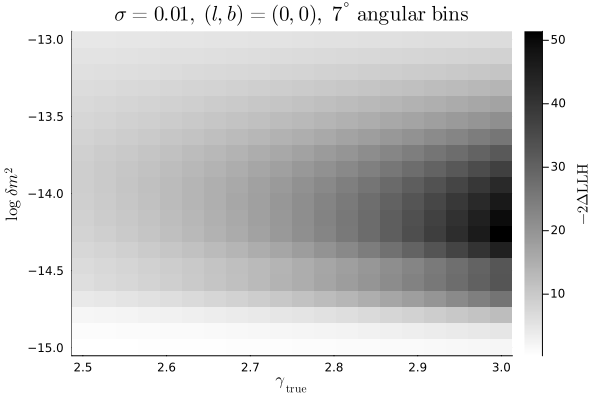

In [84]:
# Plotting the data

heatmap(
    γs,
    logdm2s,
    mat,
    xlabel=L"\gamma_{\mathrm{true}}",
    ylabel=L"\log~\delta m^2",
    colorbar_title=L"-2\Delta \mathrm{LLH}",
    title=L"\sigma = 0.01,~(l, b) = (0, 0),~7^{\circ}~\mathrm{angular~bins}",
    c=:grayC
)

In [85]:
# Saving the plots

# savefig("misc_plots/differing_gamma_true_sensitivities.png")

"/Users/millermacdonald/Desktop/Research_shit/Summer_2023_Research/GC_calcs/misc_plots/differing_gamma_true_sensitivities.png"